# Exploratory Data Analysis for Saudi Arabia Weather 

The aim of this project is to create EDA to explore trends and interesting relationships. This datasaet consists of 249023 observations, which provides hourly historical weather data for all the cities in the Saudi Araboa from 2017 to 2019.


Data Source: https://www.kaggle.com/esraamadi/saudi-arabia-weather-history


# Importing libraries


In [2]:
import pandas as pd
import matplotlib.pyplot as  plt
import seaborn as sns

# Loading data


In [3]:
df = pd.read_csv("/Users/sarahalharbi/Downloads/weather-sa-2017-2019-clean.csv")

# Summary statistics


In [4]:
df.head()

,Unnamed: 0,city,date,time,year,month,day,hour,minute,weather,temp,wind,humidity,barometer,visibility
0,0,Qassim,1 January 2017,00:00,2017,1,1,24,0,Clear,17,11,64%,1018.0,16
1,1,Qassim,1 January 2017,01:00,2017,1,1,1,0,Clear,17,6,64%,1018.0,16
2,2,Qassim,1 January 2017,03:00,2017,1,1,3,0,Clear,15,11,72%,1019.0,16
3,3,Qassim,1 January 2017,04:00,2017,1,1,4,0,Clear,15,11,72%,1019.0,16
4,4,Qassim,1 January 2017,05:00,2017,1,1,5,0,Clear,15,9,72%,1019.0,16


In [5]:
df.shape

(249023, 15)

> There are 249023 observation with 15 features for each. 

In [6]:
df.describe()

,Unnamed: 0,year,month,day,hour,minute,temp,wind,barometer,visibility
count,249023.000000,249023.000000,249023.000000,249023.000000,249023.000000,249023.000000,249023.000000,249023.000000,248951.000000,249023.000000
mean,121690.686174,2017.710007,6.050694,15.691081,12.536890,0.131108,24.722624,12.957104,1015.455355,11.053453
std,71831.546649,0.706113,3.521591,8.787958,6.910254,1.970710,8.880913,8.711619,6.970779,7.053005
min,0.000000,2017.000000,1.000000,1.000000,1.000000,0.000000,-4.000000,-1.000000,904.000000,-1.000000
25%,59402.500000,2017.000000,3.000000,8.000000,7.000000,0.000000,18.000000,7.000000,1011.000000,5.000000
50%,121658.000000,2018.000000,6.000000,16.000000,13.000000,0.000000,24.000000,11.000000,1016.000000,16.000000
75%,183913.500000,2018.000000,9.000000,23.000000,19.000000,0.000000,31.000000,19.000000,1021.000000,16.000000
max,246169.000000,2019.000000,12.000000,31.000000,24.000000,59.000000,50.000000,163.000000,1101.000000,161.000000


In [7]:
df.city.value_counts()

Jawf                20352
Mecca               20268
Tabuk               20240
Northern boarder    20235
Hail                20121
Madina              19965
Baha                19959
Najran              19847
Jazan               19829
Qassim              19793
EP                  18505
Riyadh              16421
Assir               13488
Name: city, dtype: int64

> The city column is represent the "Provinces" in Saudi Arabia, which is divided into 13 provinces. 

In [8]:
df.isnull().sum()

Unnamed: 0     0
city           0
date           0
time           0
year           0
month          0
day            0
hour           0
minute         0
weather        0
temp           0
wind           0
humidity      17
barometer     72
visibility     0
dtype: int64

In [9]:
df.dtypes

Unnamed: 0      int64
city           object
date           object
time           object
year            int64
month           int64
day             int64
hour            int64
minute          int64
weather        object
temp            int64
wind            int64
humidity       object
barometer     float64
visibility      int64
dtype: object

## Dealing with the missing values

We noticed that we have missing values in these two columns; humidity, barometer. I decide to fill those missing values by the means value for each city. 

For the humidity column, we have to convert it from object to numerical.


In [10]:
# convert the column type.
df['humidity'] = df['humidity'].str.replace('%',' ').astype('float')

In [11]:
# filling the missing values with means for each city

df["barometer"] = df.groupby("city")["barometer"].transform(lambda x: x.fillna(x.mean()))


In [12]:
df["humidity"] = df.groupby("city")["humidity"].transform(lambda x: x.fillna(x.mean()))



In [13]:
# check again for the missing values.
df.isnull().sum()

Unnamed: 0    0
city          0
date          0
time          0
year          0
month         0
day           0
hour          0
minute        0
weather       0
temp          0
wind          0
humidity      0
barometer     0
visibility    0
dtype: int64

# EDA

## Correlation heatmap 

In [ ]:
# Create correlation heatmap 
correlation = df.corr()
plt.figure(figsize=(16,12))
#title of the chart
plt.title('Correlation Heatmap of Weather in Saudi Arabia Dataset')
ax = sns.heatmap(correlation, square=True, annot=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()

> We could clearly notice that, there're no stronge positive relationship between the features, however, temp has a significant negative correlation with the barometer, humidity, -0.68, -0.60, respectively. Whereas, there're some low postive correlation between the temp and the wind at approximately 24%. It also has another low positive correlation between the temp and the time (month, hours) at roughly 0.23%.



## Explore the rainy days 

In [23]:
# set the maximum row to display all the result of the weather column 
pd.set_option("display.max_rows", None)


In [24]:
# show the all the values from the weather column
df.weather.value_counts()

Clear                                          98827
Sunny                                          82194
Passing clouds                                 34380
Scattered clouds                               15304
Partly sunny                                    6925
Duststorm                                       1893
Fog                                             1501
Broken clouds                                   1272
Thunderstorms  Passing clouds                   1232
Low level haze                                  1046
Partly cloudy                                    755
Thunderstorms  Partly sunny                      620
Haze                                             420
Dense fog                                        277
Rain  Passing clouds                             276
Thunderstorms  Scattered clouds                  221
Sandstorm                                        202
Rain  Partly sunny                               200
Overcast                                      

 > in order to sort this problem we could create new boolean column for the rain 

In [25]:
# creating new column for weather that contains the word rain or 
df['rain'] = df['weather'].str.contains('rain|thunderstorm|thundershowers|shower', case = False ,regex=True)

In [30]:
#count number of the rainy days
df['rain'].value_counts()

False    245696
True       3327
Name: rain, dtype: int64

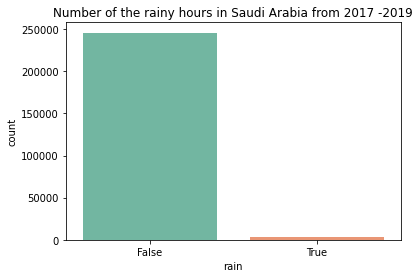

In [34]:
# create bar chart represents the rain during 2017-2019

plt.title('Number of the rainy hours in Saudi Arabia from 2017 -2019')
ax = sns.countplot(x="rain", data=df, palette="Set2")
plt.show()

It shows that our data is unblanced, we could try to explore the rainy days for each city.

In [35]:
city_rain = pd.DataFrame(df.groupby(['city','year'])['rain'].sum())

In [39]:
city_rain = city_rain.reset_index()

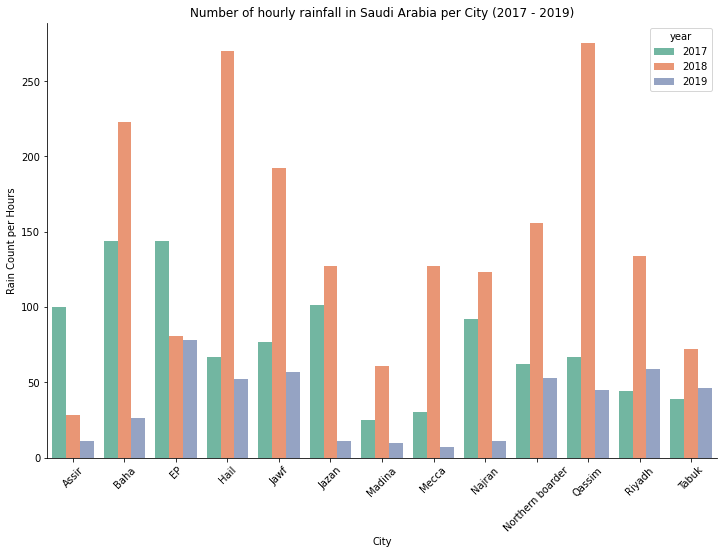

In [48]:
# create bar chart grouped by year and city 

plt.figure(figsize=(12,8))
sns.barplot(data=city_rain, x="city", y="rain", ci=None, hue='year', palette="Set2")
plt.title('Number of hourly rainfall in Saudi Arabia per City (2017 - 2019)')
plt.xlabel('City' )
plt.ylabel('Rain Count per Hours')
plt.xticks(rotation=45)
sns.despine()


plt.show()


### Observation:
<ul>
    <li>2019 shows the least number of rainfall compared to 2018 and 2017. Whereas, 2018 shows the highest number of rainfall. </li>
    <li>Starting from 2017, The Eastern Province and Baha have the highest hourly rainfall followed by Assir and Jazzn.</li>
    <ui>In 2018, Qassim and Hail have the highest hourly rainfall followed by Baha and Jouf </ui>

</ul>